These examples demonstrate the primary methods for interacting with Coramin relaxation objects.

In [1]:
import pyomo.environ as pe
import coramin
from coramin.utils.plot_feasible_region_2d import plot_feasible_region_2d

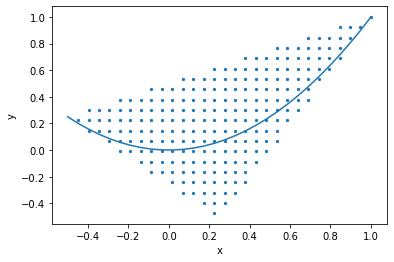

In [2]:
m = pe.ConcreteModel()
m.x = pe.Var(bounds=(-0.5, 1))
m.y = pe.Var()
m.x_sq = coramin.relaxations.PWXSquaredRelaxation()
m.x_sq.build(x=m.x, aux_var=m.y, use_linear_relaxation=True)
plot_feasible_region_2d(m.x_sq)

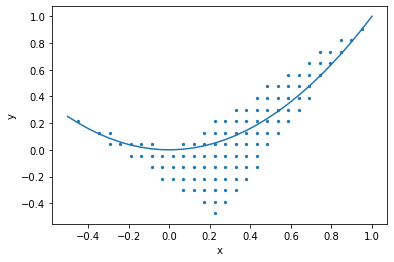

In [3]:
m.x_sq.add_partition_point(0)
m.x_sq.rebuild()
plot_feasible_region_2d(m.x_sq)

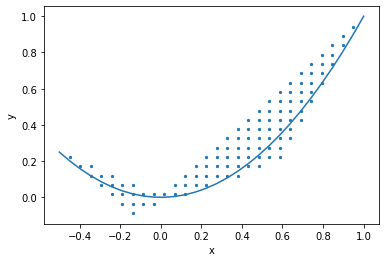

In [4]:
m.x.value = 0.2
m.x_sq.add_oa_point()
m.x_sq.rebuild()
plot_feasible_region_2d(m.x_sq)

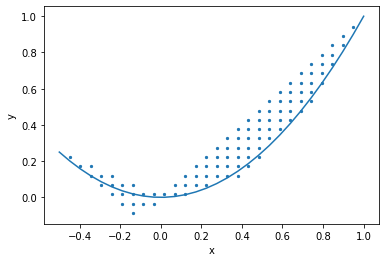

In [5]:
m.x.value = 0.6
m.x_sq.add_cut()
plot_feasible_region_2d(m.x_sq)

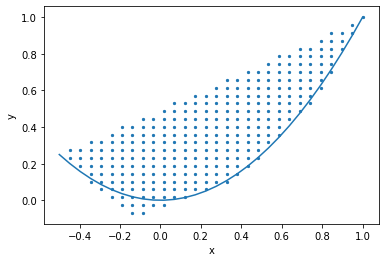

In [6]:
m.x_sq.clear_partitions()
m.x_sq.rebuild()
plot_feasible_region_2d(m.x_sq)

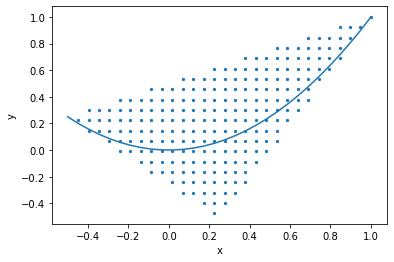

In [7]:
m.x_sq.clear_oa_points()
m.x_sq.rebuild()
plot_feasible_region_2d(m.x_sq)

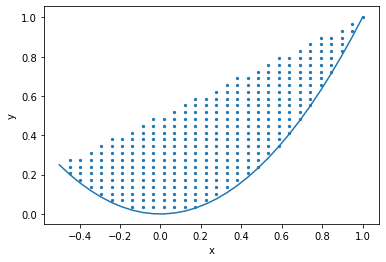

In [8]:
m.x_sq.use_linear_relaxation = False
m.x_sq.rebuild()
plot_feasible_region_2d(m.x_sq)

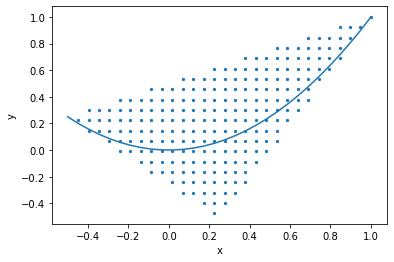

In [9]:
m.x_sq.use_linear_relaxation = True
m.x_sq.rebuild()
plot_feasible_region_2d(m.x_sq)

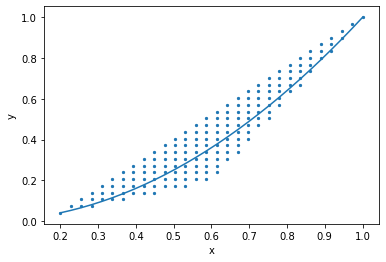

In [10]:
m.x.setlb(0.2)
m.x_sq.rebuild()
plot_feasible_region_2d(m.x_sq)

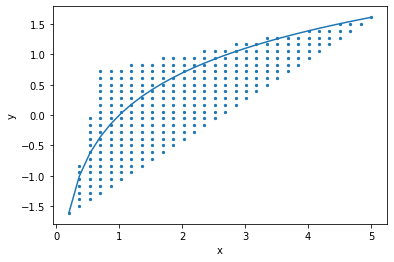

In [11]:
m.x.setub(5)
m.log_x = coramin.relaxations.PWUnivariateRelaxation()
m.log_x.build(x=m.x, aux_var=m.y, f_x_expr=pe.log(m.x), shape=coramin.utils.FunctionShape.CONCAVE)
plot_feasible_region_2d(m.log_x)

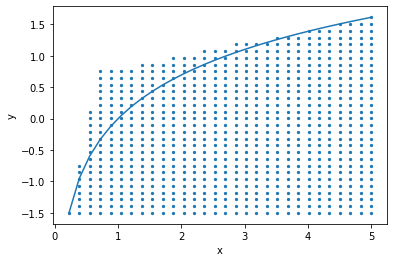

In [12]:
m.log_x.relaxation_side = coramin.utils.RelaxationSide.OVER
m.y.setlb(-1.5)
m.log_x.rebuild()
plot_feasible_region_2d(m.log_x)

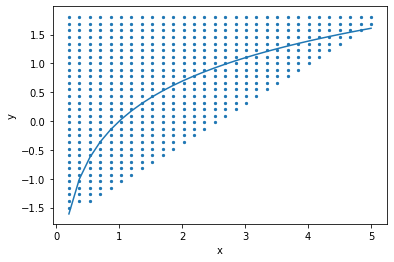

In [13]:
m.log_x.relaxation_side = coramin.utils.RelaxationSide.UNDER
m.y.setub(1.8)
m.log_x.rebuild()
plot_feasible_region_2d(m.log_x)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


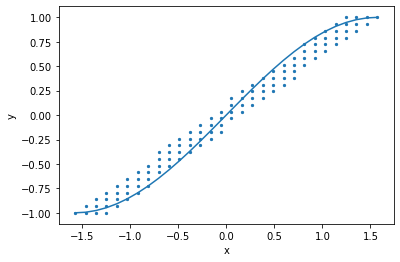

In [14]:
import math
m.x.setlb(-math.pi/2)
m.x.setub(math.pi/2)
m.y.setlb(-1)
m.y.setub(1)
m.sin_x = coramin.relaxations.PWSinRelaxation()
m.sin_x.build(x=m.x, aux_var=m.y)
plot_feasible_region_2d(m.sin_x)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


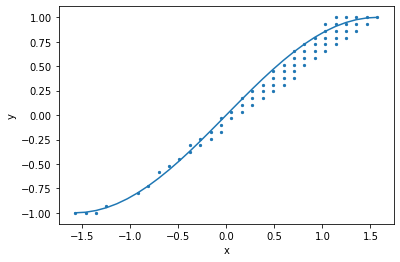

In [15]:
m.sin_x.add_partition_point(-1)
m.sin_x.rebuild()
plot_feasible_region_2d(m.sin_x)

The relaxations for sine and cosine only support a domain for x from -pi/2 to pi/2. If the lower bound is less than -pi/2 or the upper bound is larger than pi/2, then no relaxation is built.

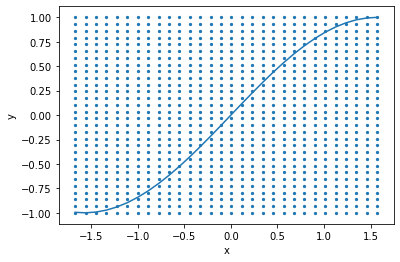

In [16]:
m.x.setlb(-math.pi/2 - 0.1)
m.x.setub(math.pi/2)
m.y.setlb(-1)
m.y.setub(1)
m.sin_x.rebuild()
plot_feasible_region_2d(m.sin_x)